In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\musab\cv_dataset\dicom_analysis (1).csv", encoding='latin-1')


In [2]:
print(list(df.columns))


['Filepath', 'FolderHierarchy', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientAge', 'PatientWeight', 'StudyDate', 'StudyTime', 'AccessionNumber', 'StudyInstanceUID', 'StudyDescription', 'Filename', 'Modality', 'SeriesNumber', 'InstanceNumber', 'Rows', 'Columns', 'PixelSpacing', 'SliceThickness', 'SpacingBetweenSlices', 'ImagePositionPatient', 'ImageOrientationPatient', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'SamplesPerPixel', 'PhotometricInterpretation', 'WindowCenter', 'WindowWidth', 'BodyPartExamined', 'ProtocolName', 'ScanningSequence', 'SequenceVariant', 'ScanOptions', 'Manufacturer', 'ManufacturerModelName', 'StationName', 'SoftwareVersions', 'ValidationStatus', 'ValidationMessage', 'CT_KVP', 'CT_XRayTubeCurrent', 'CT_ExposureTime', 'CT_Exposure', 'CT_ExposureInuAs', 'CT_CTDIvol', 'CT_DLP', 'CT_ConvolutionKernel', 'CT_AcquisitionType', 'CT_DataCollectionDiameter', 'CT_ReconstructionDiameter', 'CT_DistanceSourceToDetector', 'CT_Dist

In [3]:
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\musab\cv_dataset\dicom_analysis (1).csv", encoding='latin-1')

# Get unique values from the 'FolderHierarchy' column
unique_values = df['FolderHierarchy'].unique()

# Display the unique values
print(unique_values)

['Acibadem\\AC-AT-1\\DICOM\\ST000000\\SE000002'
 'Acibadem\\AC-AT-2\\DICOM\\ST000000\\SE000001'
 'Acibadem\\AC-AT-2\\DICOM\\ST000001\\SE000000'
 'Acibadem\\ACI-10\\SE000000' 'Acibadem\\ACI-12\\SE000000'
 'Acibadem\\ACI-13\\SE000000'
 'Acibadem\\ACI-14 (Metehan Beyazyüz)\\SE000000'
 'Acibadem\\ACI-15 (Esen Bekir Pre-op)\\ST000000\\SE000000'
 'Acibadem\\ACI-16 (Esen BekirPost-op)\\SE000000'
 'Acibadem\\ACI-2\\SE000000' 'Acibadem\\ACI-3\\ST000000 - Copy\\SE000000'
 'Acibadem\\ACI-3\\ST000001\\SE000013' 'Acibadem\\ACI-5\\SE000029'
 'Acibadem\\ACI-7\\SE000019'
 'DATASETS_III\\Medi-48\\AkayBebek\\DICOM\\628055'
 'DATASETS_III\\Medi-53\\DorukCeci\\DICOM\\628702'
 'DATASETS_III\\Medi-48\\AkayBebek\\DICOM\\632237'
 'DATASETS_III\\Medi-48\\AkayBebek\\DICOM\\632910'
 'DATASETS_III\\Medi-48\\AkayBebek\\DICOM\\634104'
 'DATASETS_III\\Medi-48\\AkayBebek\\DICOM\\635146'
 'DATASETS_III\\Medi-48\\AkayBebek\\DICOM\\635866'
 'DATASETS_III\\Medi-55\\EsmaCiftci\\8296\\DICOMIMG'
 'DATASETS_III\\Medi-56\\Dat

In [4]:
import pandas as pd
import numpy as np

# Read in the dataset
df = pd.read_csv(r"C:\Users\musab\cv_dataset\dicom_analysis (1).csv", encoding='latin-1')

# -----------------------
# 1. Total patients
# -----------------------

# Count total unique patients in the dataset
total_patients = df['PatientID'].nunique()
print("Total unique patients:", total_patients)

# -----------------------
# 2. Age/Sex Distribution
# -----------------------
# Typically, in DICOM metadata, PatientAge can appear in the form '034Y' (meaning 34 years).
# If so, we strip out the trailing 'Y' (or other possible character) and convert to numeric.

# Clean up 'PatientAge' to extract the numeric part if it contains strings like '034Y', '45Y', etc.
df['NumericAge'] = (df['PatientAge']
                    .astype(str)
                    .str.extract(r'(\d+)')        # Extract the digits (e.g. 034 from '034Y')
                    .astype(float))               # Convert to float

# Now you can get descriptive statistics of age
age_stats = df['NumericAge'].describe()
print("\nAge Statistics (years):")
print(age_stats)

# Check the sex distribution
sex_distribution = df['PatientSex'].value_counts(dropna=False)
print("\nSex Distribution:")
print(sex_distribution)

# -----------------------
# 3. Modality Split (CT vs MRI)
# -----------------------
# Count the occurrences of each modality in the 'Modality' column
modality_counts = df['Modality'].value_counts(dropna=False)
print("\nModality Distribution:")
print(modality_counts)

# -----------------------
# (Optional) Additional Grouped Insights
# -----------------------
# If you want to break down the number of patients per sex, per modality, etc.
# you can do group-bys such as:

# Group by 'PatientSex' and 'Modality' and count unique patients
grouped_counts = (df.groupby(['PatientSex', 'Modality'])['PatientID']
                  .nunique()
                  .reset_index(name='UniquePatientCount'))

print("\nBreakdown by Sex and Modality:")
print(grouped_counts)


Total unique patients: 100

Age Statistics (years):
count    123.000000
mean       7.560976
std        6.271385
min        0.000000
25%        2.000000
50%        6.000000
75%       11.000000
max       30.000000
Name: NumericAge, dtype: float64

Sex Distribution:
PatientSex
M    194
F    145
Name: count, dtype: int64

Modality Distribution:
Modality
CR    225
CT     98
MR     13
PR      2
DX      1
Name: count, dtype: int64

Breakdown by Sex and Modality:
  PatientSex Modality  UniquePatientCount
0          F       CR                   9
1          F       CT                  42
2          F       DX                   1
3          F       MR                   7
4          F       PR                   1
5          M       CR                  10
6          M       CT                  45
7          M       MR                   6
8          M       PR                   1


In [19]:
import pandas as pd

# Read in the dataset
df = pd.read_csv(r"C:\Users\musab\cv_dataset\dicom_analysis (1).csv", encoding='latin-1')

# Clean PatientID
df['PatientID'] = df['PatientID'].str.strip().str.lower()
#Remove g prefixes.
df['PatientID'] = df['PatientID'].str.replace('^g', '', regex=True)
#Remove leading zeros.
df['PatientID'] = df['PatientID'].str.lstrip('0')

# Handle NaN values
df = df.dropna(subset=['PatientID'])

# Recalculate unique patients
total_patients = df['PatientID'].nunique()
print("Total unique patients (after cleaning):", total_patients)

#print unique values for manual inspection.
print(df['PatientID'].unique())
print(df['PatientID'].isnull().sum())
print(df[df['PatientID'] == ''].shape[0])

Total unique patients (after cleaning): 100
['75157626' '70294948' '70104314' '70080273' '70130494' '70091400'
 '70112268' '13492591' '13318209' '70094651' '70264843' 'bgc1225922'
 '10274519368' '61030299932' '31471703916' '42007100420' '34889028596'
 '821299' '13305112804' '919368' '995577' '989627' '989241' '980189'
 '984554' '45995035088' '42782135204' '28648192482' '726047' '846388'
 '872998' '75832040920' '26063050530' '43978563498' '57034655218'
 '25817698028' '13437118446' 'bgc1065876' 'bgc1065886' '73819109424'
 'bgc1065891' 'bgc1065880' '1031889' 'bgc1086535' '12900129576'
 '41399088798' '47779968018' '11928161964' 'bgc1094734' '34645043368'
 '55630702008' '24005762152' '26188817056' '1031886' '925575'
 '34334413724' '19085416026' '47137978130' '35435378356' '99578049900'
 '17297976468' '77730' '18050899550' '18224725708' '27329651386'
 '21328282008' '67894232078' '53488777582' '99586412734' '2749702888'
 '1302147619' '37792985178' '7026487260' '9432405750' '7288726148'
 '2555

Total unique patients: 100

Age Statistics (years):
count    123.000000
mean       7.560976
std        6.271385
min        0.000000
25%        2.000000
50%        6.000000
75%       11.000000
max       30.000000
Name: NumericAge, dtype: float64

Sex Distribution:
PatientSex
M    194
F    145
Name: count, dtype: int64

Modality Distribution:
Modality
CR    225
CT     98
MR     13
PR      2
DX      1
Name: count, dtype: int64


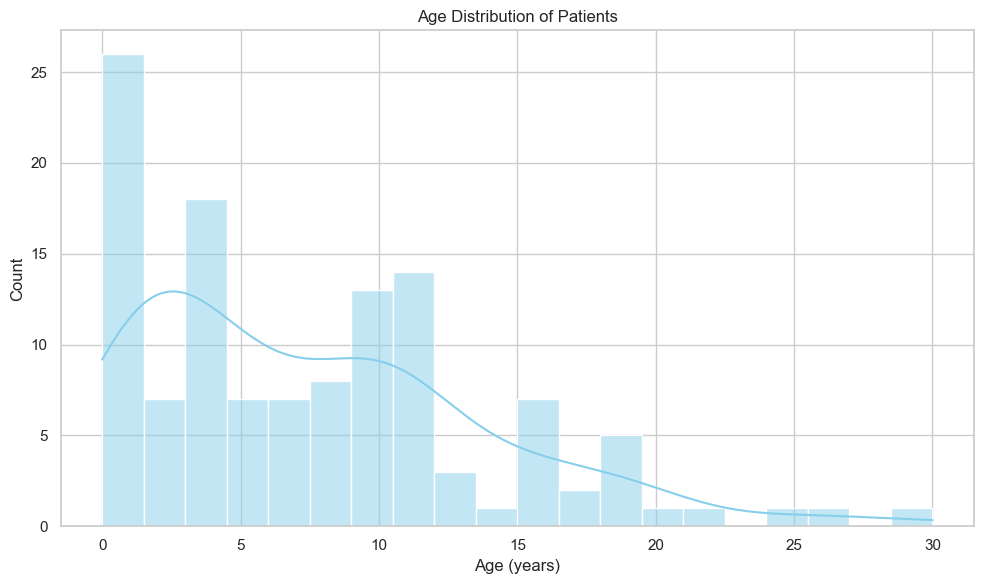

C:\Users\musab\AppData\Local\Temp\ipykernel_3696\457191030.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sex_counts, x='PatientSex', y='Count', palette="pastel")


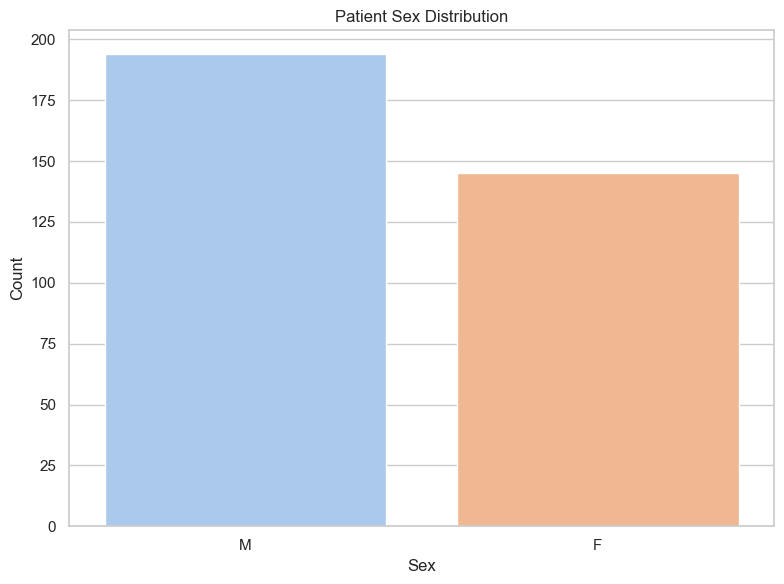

C:\Users\musab\AppData\Local\Temp\ipykernel_3696\457191030.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=modality_counts_df, x='Modality', y='Count', palette="deep")


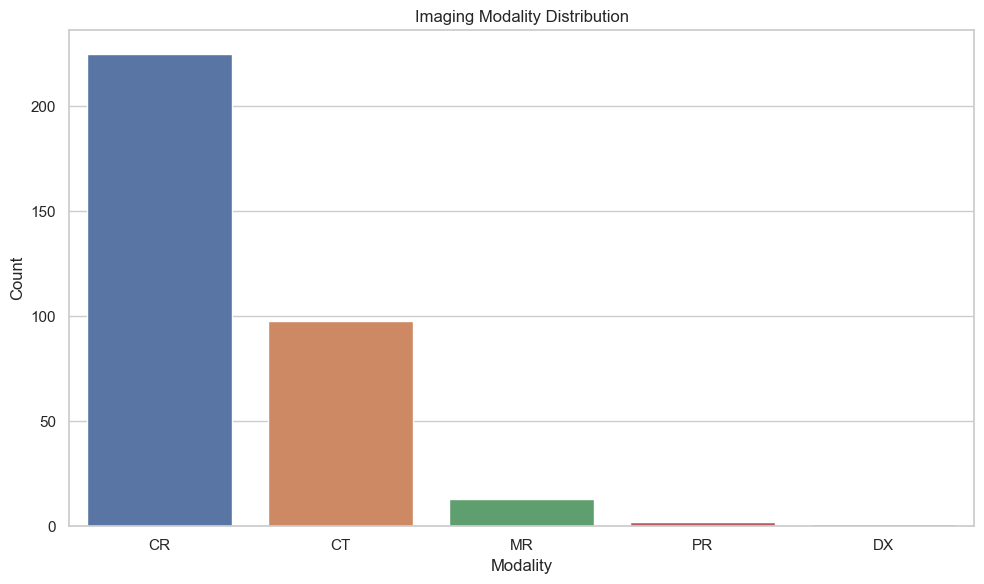

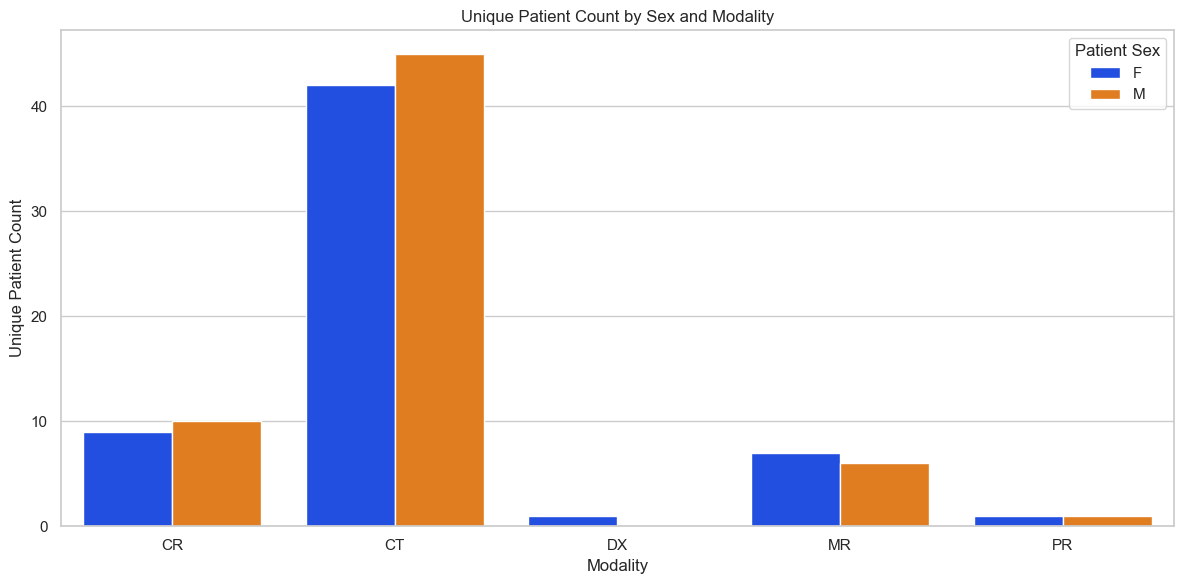

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Jupyter notebooks, enable inline plotting:
# %matplotlib inline  

# Read in the dataset
df = pd.read_csv(r"C:\Users\musab\cv_dataset\dicom_analysis (1).csv", encoding='latin-1')

# -----------------------
# 1. Total Patients
# -----------------------
total_patients = df['PatientID'].nunique()
print("Total unique patients:", total_patients)

# -----------------------
# 2. Age/Sex Distribution
# -----------------------
# Extract the numeric part of the PatientAge (e.g., '034Y' becomes 34).
df['NumericAge'] = (
    df['PatientAge']
    .astype(str)
    .str.extract(r'(\d+)')  # Extract digits
    .astype(float)
)

# Compute age statistics
age_stats = df['NumericAge'].describe()
print("\nAge Statistics (years):")
print(age_stats)

# Sex distribution
sex_distribution = df['PatientSex'].value_counts(dropna=False)
print("\nSex Distribution:")
print(sex_distribution)

# -----------------------
# 3. Modality Split (CT vs MRI)
# -----------------------
modality_counts = df['Modality'].value_counts(dropna=False)
print("\nModality Distribution:")
print(modality_counts)

# -----------------------
# 4. Visualization
# -----------------------

# Set style for Seaborn
sns.set(style="whitegrid", palette="muted")

# --- Visualizing Age Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df['NumericAge'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- Visualizing Sex Distribution ---
plt.figure(figsize=(8, 6))
sex_counts = sex_distribution.reset_index()
sex_counts.columns = ['PatientSex', 'Count']
sns.barplot(data=sex_counts, x='PatientSex', y='Count', palette="pastel")
plt.title("Patient Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- Visualizing Modality Distribution (CT vs. MRI) ---
plt.figure(figsize=(10, 6))
modality_counts_df = modality_counts.reset_index()
modality_counts_df.columns = ['Modality', 'Count']
sns.barplot(data=modality_counts_df, x='Modality', y='Count', palette="deep")
plt.title("Imaging Modality Distribution")
plt.xlabel("Modality")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- Optional: Grouped Insights (Sex vs. Modality) ---
# Group by PatientSex and Modality to count unique patients
grouped_counts = (df.groupby(['PatientSex', 'Modality'])['PatientID']
                  .nunique()
                  .reset_index(name='UniquePatientCount'))

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_counts, x='Modality', y='UniquePatientCount', hue='PatientSex', palette="bright")
plt.title("Unique Patient Count by Sex and Modality")
plt.xlabel("Modality")
plt.ylabel("Unique Patient Count")
plt.legend(title="Patient Sex")
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

# Read in the dataset
df = pd.read_csv(r"C:\Users\musab\cv_dataset\dicom_analysis (1).csv", encoding='latin-1')

# Get list of unique patient IDs
unique_patients = df['PatientID'].unique()

# Iterate through each patient and only process those that have MRI scans.
for patient in unique_patients:
    # Filter the data for the current patient
    patient_df = df[df['PatientID'] == patient]
    # Filter for MRI scans (if modality is either 'MR' or 'MRI')
    mri_df = patient_df[patient_df['Modality'].isin(['MR', 'MRI'])]
    
    # Only print if there is at least one MRI record for the patient
    if not mri_df.empty:
        print(f"PatientID: {patient}")
        print("  MRI scans folder hierarchy:")
        for idx, row in mri_df.iterrows():
            print(f"    FolderHierarchy: {row['FolderHierarchy']}  |  Modality: {row['Modality']}")
        print("-" * 60)


PatientID: 70104314
  MRI scans folder hierarchy:
    FolderHierarchy: Acibadem\ACI-10\SE000000  |  Modality: MR
------------------------------------------------------------
PatientID: 70080273
  MRI scans folder hierarchy:
    FolderHierarchy: Acibadem\ACI-12\SE000000  |  Modality: MR
------------------------------------------------------------
PatientID: 70130494
  MRI scans folder hierarchy:
    FolderHierarchy: Acibadem\ACI-13\SE000000  |  Modality: MR
------------------------------------------------------------
PatientID: 70091400
  MRI scans folder hierarchy:
    FolderHierarchy: Acibadem\ACI-14 (Metehan Beyazyüz)\SE000000  |  Modality: MR
------------------------------------------------------------
PatientID: 13318209
  MRI scans folder hierarchy:
    FolderHierarchy: Acibadem\ACI-3\ST000001\SE000013  |  Modality: MR
------------------------------------------------------------
PatientID: 70094651
  MRI scans folder hierarchy:
    FolderHierarchy: Acibadem\ACI-5\SE000029  |  Moda

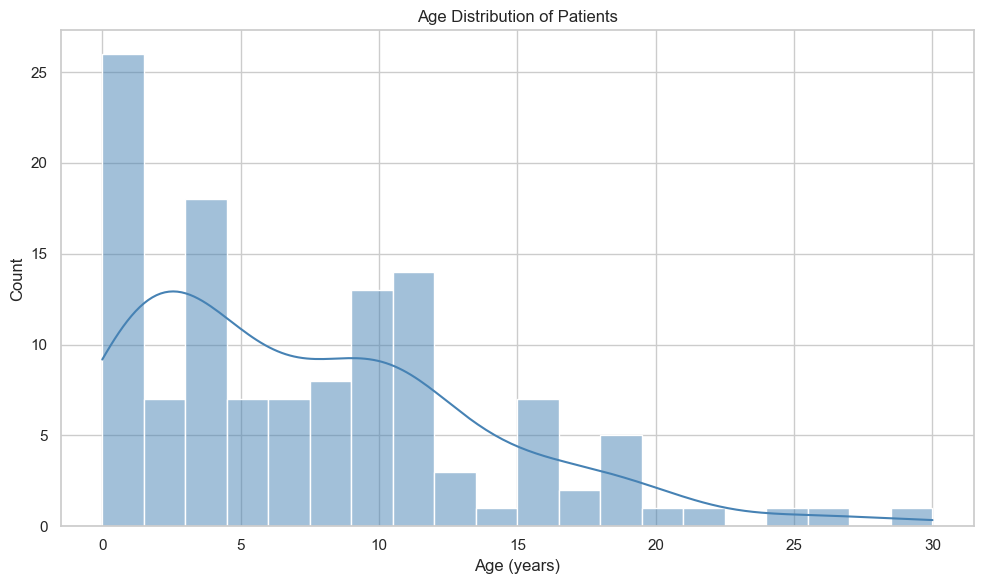

C:\Users\musab\AppData\Local\Temp\ipykernel_3696\2715256468.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sex_counts, x='PatientSex', y='Count', palette="pastel")


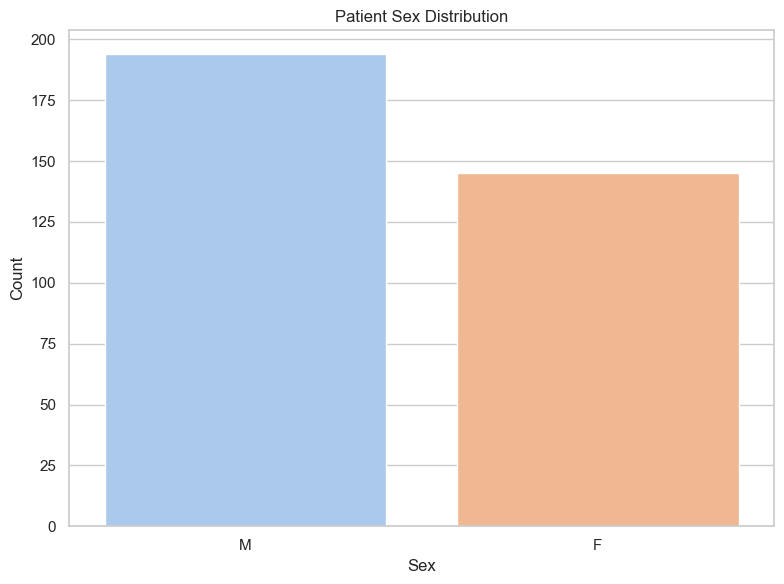

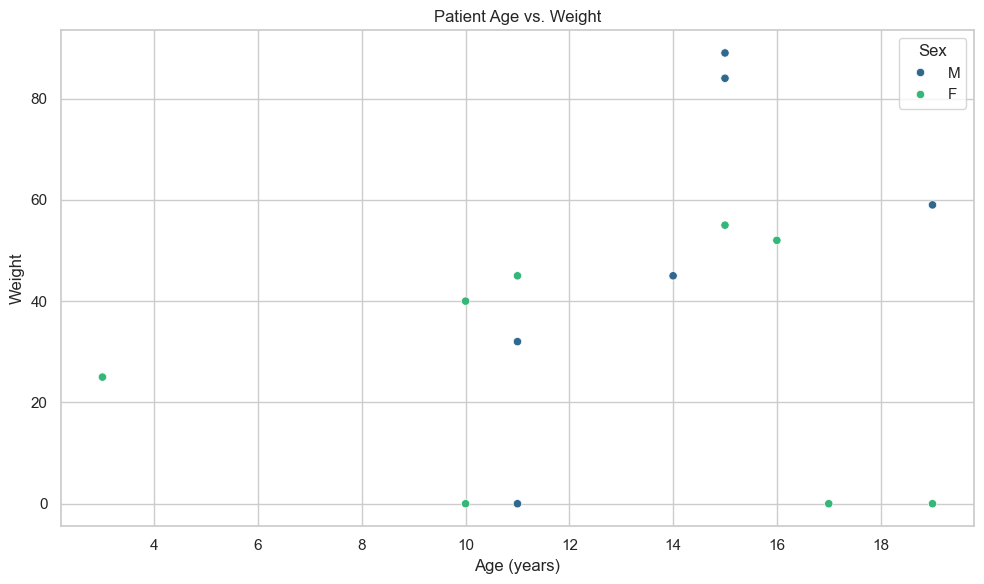

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the dataset
df = pd.read_csv(r"C:\Users\musab\cv_dataset\dicom_analysis (1).csv", encoding='latin-1')

# Convert age column to numeric (assuming format '034Y', etc.)
df['NumericAge'] = (df['PatientAge']
                    .astype(str)
                    .str.extract(r'(\d+)')
                    .astype(float))

# --- 1.a Age Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df['NumericAge'].dropna(), bins=20, kde=True, color='steelblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- 1.b Gender Distribution ---
plt.figure(figsize=(8, 6))
sex_counts = df['PatientSex'].value_counts().reset_index()
sex_counts.columns = ['PatientSex', 'Count']
sns.barplot(data=sex_counts, x='PatientSex', y='Count', palette="pastel")
plt.title("Patient Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- 1.c Age vs. Weight Scatter Plot ---
plt.figure(figsize=(10, 6))
# Ensure the weight is numeric; if weight is stored as text, additional cleaning might be required.
df['PatientWeight'] = pd.to_numeric(df['PatientWeight'], errors='coerce')
sns.scatterplot(data=df, x='NumericAge', y='PatientWeight', hue='PatientSex', palette="viridis")
plt.title("Patient Age vs. Weight")
plt.xlabel("Age (years)")
plt.ylabel("Weight")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


C:\Users\musab\AppData\Local\Temp\ipykernel_3696\2019878349.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=modality_counts, x='Modality', y='Count', palette="deep")


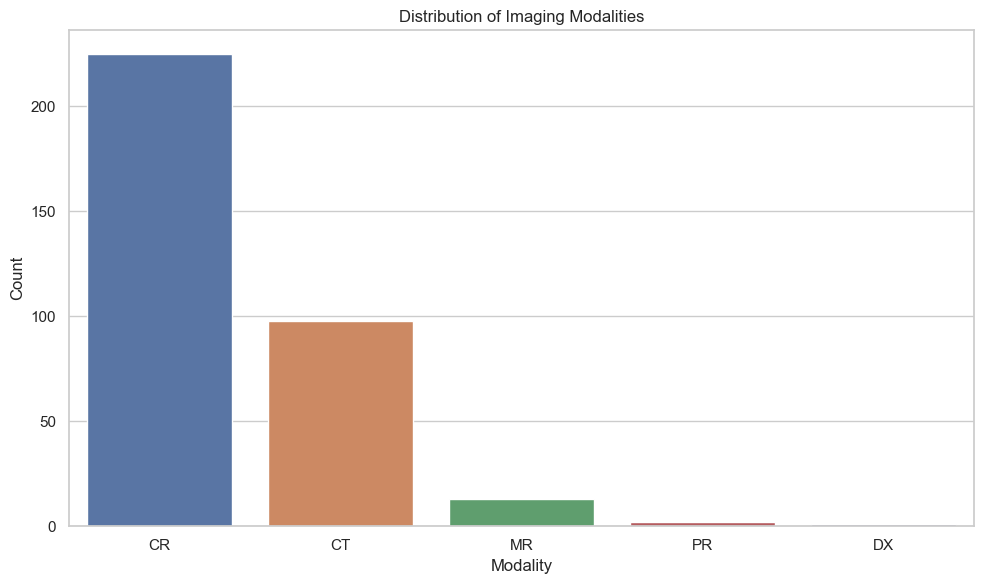

Patients with MRI scans:

PatientID: 70104314
         FolderHierarchy Modality
Acibadem\ACI-10\SE000000       MR

PatientID: 70080273
         FolderHierarchy Modality
Acibadem\ACI-12\SE000000       MR

PatientID: 70130494
         FolderHierarchy Modality
Acibadem\ACI-13\SE000000       MR

PatientID: 70091400
                            FolderHierarchy Modality
Acibadem\ACI-14 (Metehan Beyazyüz)\SE000000       MR

PatientID: 13318209
                 FolderHierarchy Modality
Acibadem\ACI-3\ST000001\SE000013       MR

PatientID: 70094651
        FolderHierarchy Modality
Acibadem\ACI-5\SE000029       MR

PatientID: 70264843
        FolderHierarchy Modality
Acibadem\ACI-7\SE000019       MR

PatientID: 10274519368
                              FolderHierarchy Modality
DATASETS_III\Medi-55\EsmaCiftci\8296\DICOMIMG       MR

PatientID: 61030299932
                         FolderHierarchy Modality
DATASETS_III\Medi-56\Data\445776\1147524       MR

PatientID: 31471703916
                  Fo

In [8]:
# --- 2.a Modality Distribution ---
plt.figure(figsize=(10, 6))
modality_counts = df['Modality'].value_counts().reset_index()
modality_counts.columns = ['Modality', 'Count']
sns.barplot(data=modality_counts, x='Modality', y='Count', palette="deep")
plt.title("Distribution of Imaging Modalities")
plt.xlabel("Modality")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- 2.b Patient-level Modality (only those with MRI) ---
# Filtering patients that have at least one MRI (assuming modalities: 'MR' or 'MRI')
mri_df = df[df['Modality'].isin(['MR', 'MRI'])]
unique_mri_patients = mri_df['PatientID'].unique()

print("Patients with MRI scans:")
for patient in unique_mri_patients:
    patient_data = mri_df[mri_df['PatientID'] == patient][['FolderHierarchy', 'Modality']]
    print(f"\nPatientID: {patient}")
    print(patient_data.to_string(index=False))


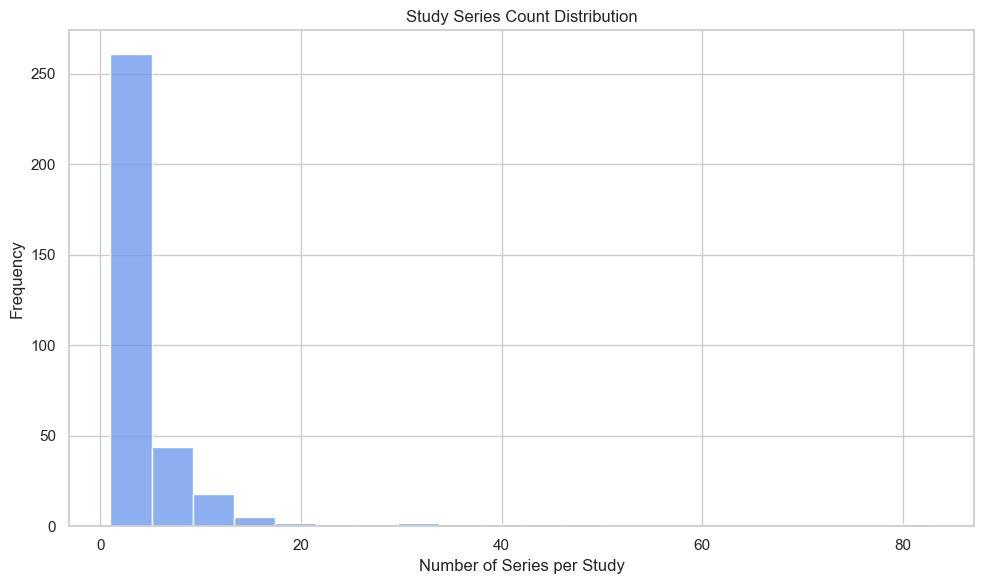

C:\Users\musab\AppData\Local\Temp\ipykernel_3696\1067904633.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=manufacturer_counts.head(10), x='Manufacturer', y='Count', palette="rocket")


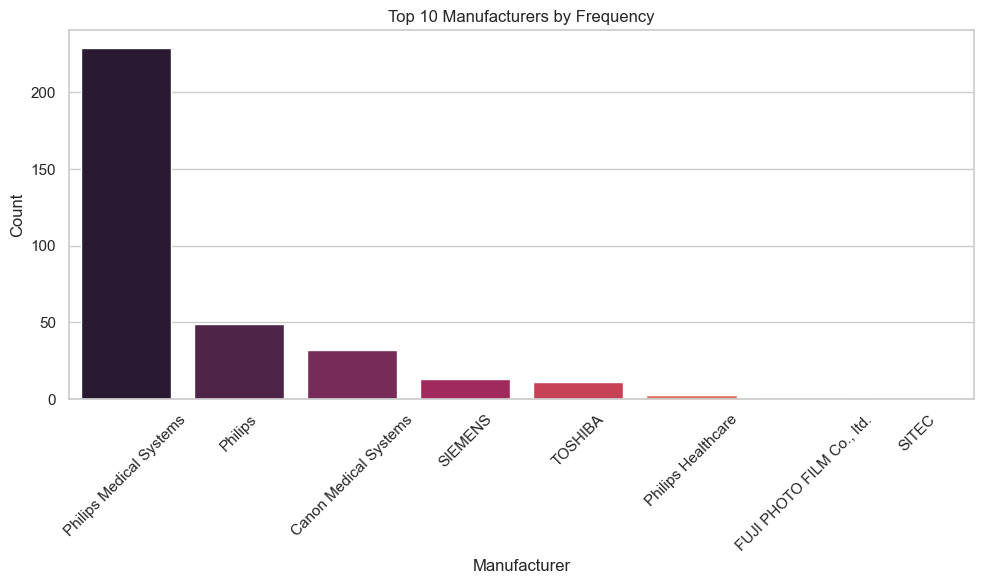

In [11]:
# --- 5.a Study Series Count Distribution ---
df['Study_SeriesCount'] = pd.to_numeric(df['Study_SeriesCount'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(df['Study_SeriesCount'].dropna(), bins=20, kde=False, color='cornflowerblue')
plt.title("Study Series Count Distribution")
plt.xlabel("Number of Series per Study")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- 5.b Manufacturer Frequency ---
plt.figure(figsize=(10, 6))
manufacturer_counts = df['Manufacturer'].value_counts().reset_index()
manufacturer_counts.columns = ['Manufacturer', 'Count']
sns.barplot(data=manufacturer_counts.head(10), x='Manufacturer', y='Count', palette="rocket")
plt.title("Top 10 Manufacturers by Frequency")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\musab\AppData\Local\Temp\ipykernel_3696\1831009518.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_df[col] = pd.to_numeric(ct_df[col], errors='coerce')


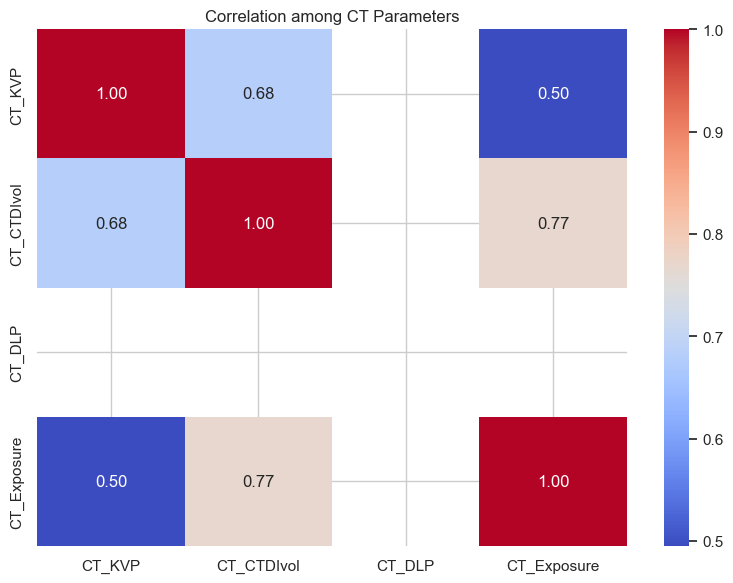

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the dataset
df = pd.read_csv(r"C:\Users\musab\cv_dataset\dicom_analysis (1).csv", encoding='latin-1')

# Filter for CT records as an example
ct_df = df[df['Modality'] == 'CT']

# Convert key CT parameters to numeric values (if they aren't already)
numeric_cols = ['CT_KVP', 'CT_CTDIvol', 'CT_DLP', 'CT_Exposure']
for col in numeric_cols:
    ct_df[col] = pd.to_numeric(ct_df[col], errors='coerce')

# Compute correlations between CT parameters
corr_matrix = ct_df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation among CT Parameters")
plt.tight_layout()
plt.show()


C:\Users\musab\AppData\Local\Temp\ipykernel_3696\3279081762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_df['SliceThickness'] = pd.to_numeric(ct_df['SliceThickness'], errors='coerce')
C:\Users\musab\AppData\Local\Temp\ipykernel_3696\3279081762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_df['WindowWidth'] = pd.to_numeric(ct_df['WindowWidth'], errors='coerce')


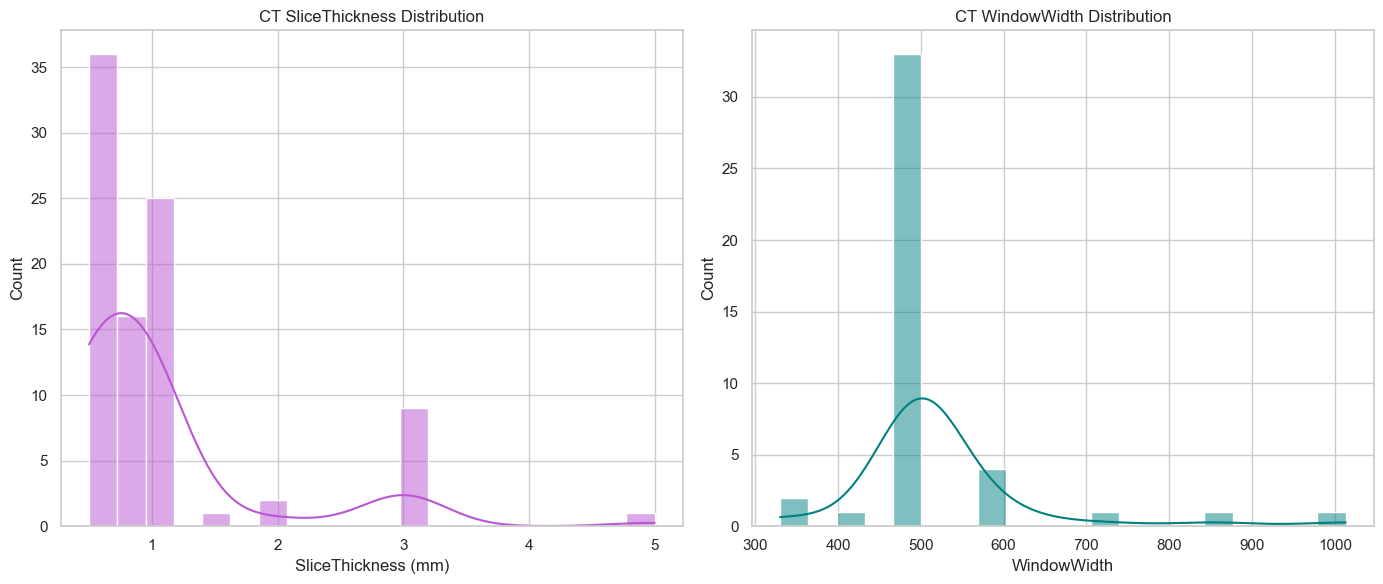

In [13]:
# For demonstration, visualizing SliceThickness and WindowWidth for CT scans
ct_df['SliceThickness'] = pd.to_numeric(ct_df['SliceThickness'], errors='coerce')
ct_df['WindowWidth'] = pd.to_numeric(ct_df['WindowWidth'], errors='coerce')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(ct_df['SliceThickness'].dropna(), bins=20, kde=True, color='mediumorchid')
plt.title("CT SliceThickness Distribution")
plt.xlabel("SliceThickness (mm)")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(ct_df['WindowWidth'].dropna(), bins=20, kde=True, color='teal')
plt.title("CT WindowWidth Distribution")
plt.xlabel("WindowWidth")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


C:\Users\musab\AppData\Local\Temp\ipykernel_3696\3182612971.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_df['CT_KVP'] = pd.to_numeric(ct_df['CT_KVP'], errors='coerce')


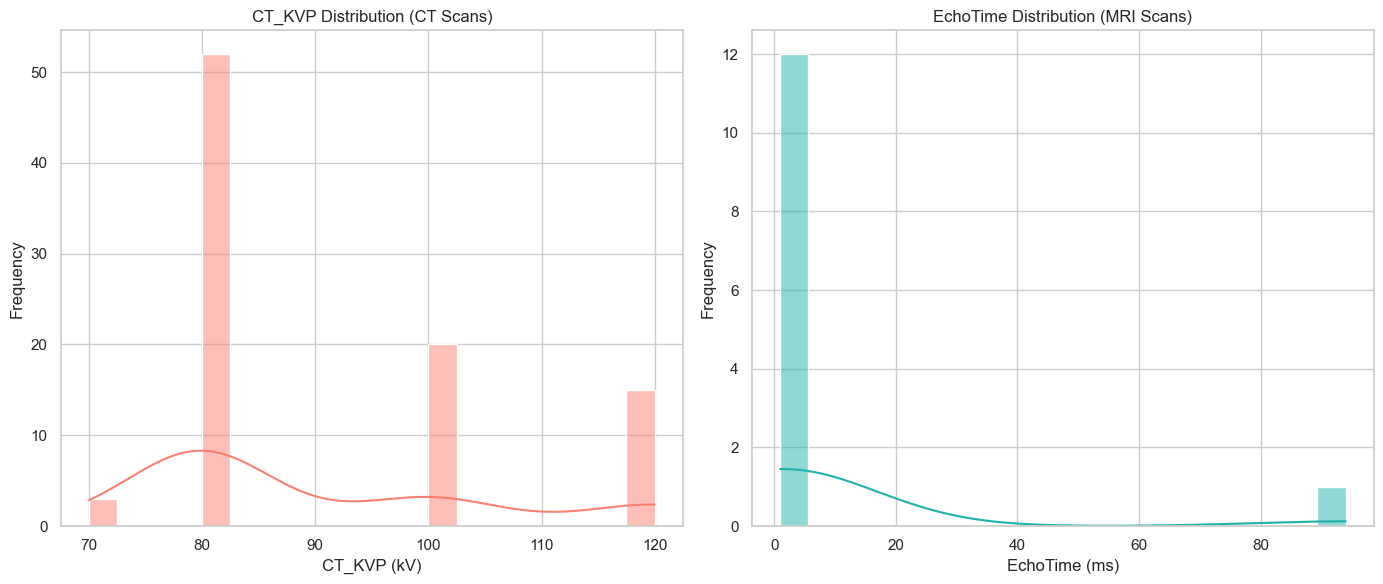

In [15]:
# Prepare data: Convert EchoTime (common in MRI) to numeric
df['EchoTime'] = pd.to_numeric(df['EchoTime'], errors='coerce')

# Create a figure with two subplots for side-by-side comparison
plt.figure(figsize=(14, 6))

# CT parameter: CT_KVP distribution
ct_df = df[df['Modality'] == 'CT']
ct_df['CT_KVP'] = pd.to_numeric(ct_df['CT_KVP'], errors='coerce')
plt.subplot(1, 2, 1)
sns.histplot(ct_df['CT_KVP'].dropna(), bins=20, kde=True, color='salmon')
plt.title("CT_KVP Distribution (CT Scans)")
plt.xlabel("CT_KVP (kV)")
plt.ylabel("Frequency")

# MRI parameter: EchoTime distribution (for MR scans)
mr_df = df[df['Modality'].isin(['MR', 'MRI'])]
plt.subplot(1, 2, 2)
sns.histplot(mr_df['EchoTime'].dropna(), bins=20, kde=True, color='lightseagreen')
plt.title("EchoTime Distribution (MRI Scans)")
plt.xlabel("EchoTime (ms)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Modality     CR  CT  DX  MR  PR
PatientID                      
10274519368   0   0   0   1   0
1031886       6   1   0   0   0
1031889      12   1   0   0   0
11849908112   0   1   0   0   0
11928161964   0   1   0   0   0
12900129576   9   3   0   0   0
13109748520   0   1   0   0   0
13305112804   0   1   0   0   0
13318209      1   0   0   1   0
13437118446   0   3   0   0   0


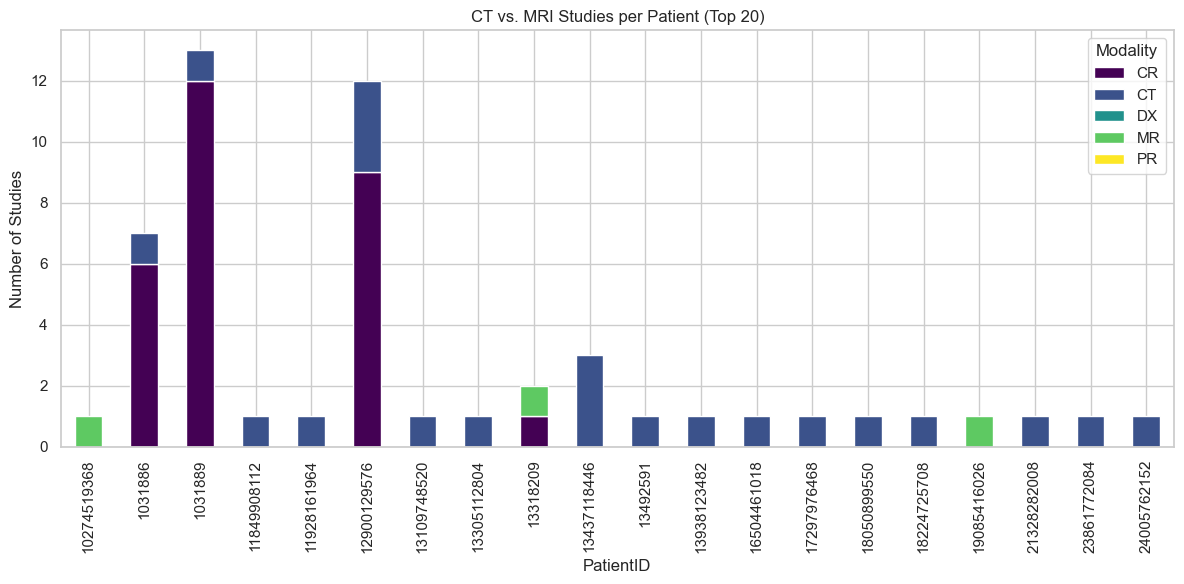

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by PatientID and Modality, counting the number of studies per patient for each modality
patient_modality = df.groupby(['PatientID', 'Modality']).size().unstack(fill_value=0)

# Display the patient-modality table
print(patient_modality.head(10))

# Optionally, display as a stacked bar chart:
patient_modality_subset = patient_modality.head(20)  # Subset for clarity
patient_modality_subset.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("CT vs. MRI Studies per Patient (Top 20)")
plt.xlabel("PatientID")
plt.ylabel("Number of Studies")
plt.legend(title="Modality")
plt.tight_layout()
plt.show()
